# 1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "E:\ancnda\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "E:\ancnda\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "E:\ancnda\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "E:\ancnda\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 126, in _parse_requirement

In [ ]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8

In [ ]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [ ]:
import cv2
import imghdr

C:\Users\shaya\AppData\Local\Temp\ipykernel_24096\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [ ]:
data_dir = r'C:\Users\shaya\Downloads\3jgky8cxhcndurawfpb8i7\images.cv_3jgky8cxhcndurawfpb8i7\data\train'

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            #os.remove(image_path)

# 3. Load Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 833 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

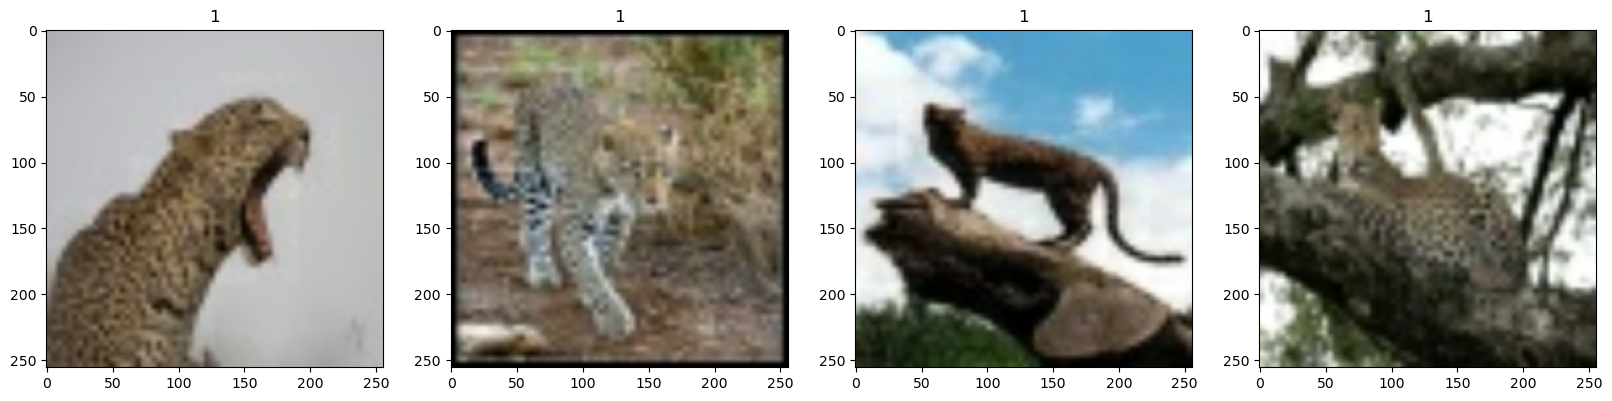

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.6313726 , 0.54509807, 0.49019608],
          [0.6313726 , 0.54509807, 0.49019608],
          [0.62941176, 0.5446078 , 0.4882353 ],
          ...,
          [0.5833333 , 0.5127451 , 0.4343137 ],
          [0.5803922 , 0.50980395, 0.43137255],
          [0.5803922 , 0.50980395, 0.43137255]],
 
         [[0.6313726 , 0.54509807, 0.49019608],
          [0.6313726 , 0.54509807, 0.49019608],
          [0.62941176, 0.5446078 , 0.4882353 ],
          ...,
          [0.5833333 , 0.5127451 , 0.4343137 ],
          [0.5803922 , 0.50980395, 0.43137255],
          [0.5803922 , 0.50980395, 0.43137255]],
 
         [[0.6313726 , 0.54509807, 0.49019608],
          [0.6313726 , 0.54509807, 0.49019608],
          [0.62941176, 0.5446078 , 0.4882353 ],
          ...,
          [0.5837622 , 0.513174  , 0.43474266],
          [0.5808824 , 0.51029414, 0.43186274],
          [0.5808824 , 0.51029414, 0.43186274]],
 
         ...,
 
         [[0.60637254, 0.5710784 , 0.5122549 ],
          [0.60637

# 5. Split Data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

18

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
18/18 [==============================] - 14s 633ms/step - loss: 0.3442 - accuracy: 0.9184 - val_loss: 0.2059 - val_accuracy: 0.9438
Epoch 2/20
18/18 [==============================] - 11s 590ms/step - loss: 0.3158 - accuracy: 0.9184 - val_loss: 0.2862 - val_accuracy: 0.9187
Epoch 3/20
18/18 [==============================] - 12s 625ms/step - loss: 0.3280 - accuracy: 0.9184 - val_loss: 0.1382 - val_accuracy: 0.9688
Epoch 4/20
18/18 [==============================] - 11s 590ms/step - loss: 0.3458 - accuracy: 0.9045 - val_loss: 0.3542 - val_accuracy: 0.9000
Epoch 5/20
18/18 [==============================] - 11s 585ms/step - loss: 0.2650 - accuracy: 0.9271 - val_loss: 0.2166 - val_accuracy: 0.9438
Epoch 6/20
18/18 [==============================] - 11s 584ms/step - loss: 0.2556 - accuracy: 0.9201 - val_loss: 0.2283 - val_accuracy: 0.9312
Epoch 7/20
18/18 [==============================] - 11s 601ms/step - loss: 0.2475 - accuracy: 0.9167 - val_loss: 0.2203 - val_accuracy: 0.9563

# 8. Plot Performance

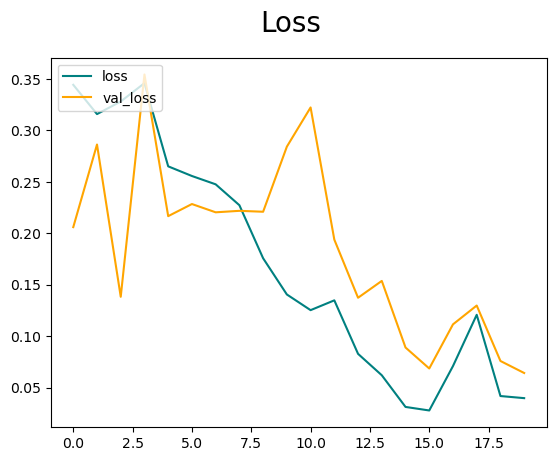

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

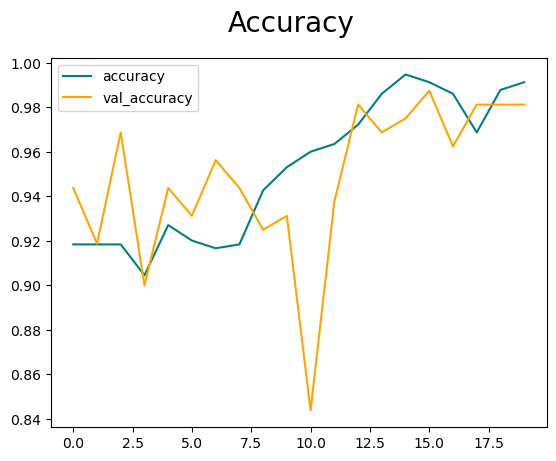

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 155ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9836066, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.984375, shape=(), dtype=float32)


# 10. Test

In [ ]:
import cv2

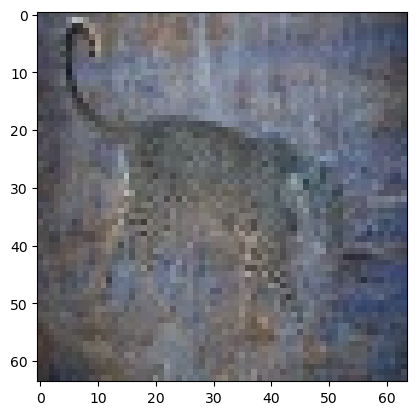

In [ ]:
img = cv2.imread(r'C:\Users\shaya\Downloads\3jgky8cxhcndurawfpb8i7\images.cv_3jgky8cxhcndurawfpb8i7\data\train\leopard\M95MU9BVIX3C.jpg')
plt.imshow(img)
plt.show()

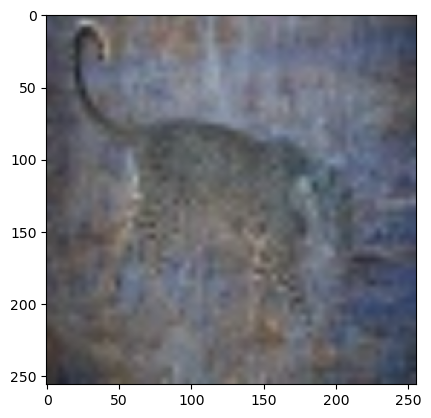

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 154ms/step


In [ ]:
yhat

array([[0.94265413]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is leopard')
else:
    print(f'Predicted class is not leopard')

Predicted class is leopard
